<a id='il'></a>
## Importing libraries

In [2]:
#importing Libraries for exploring and Visualize Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

### General Properties

In [3]:
# Load data
df=pd.read_csv('../input/effect-of-climate-on-crops/climate-ds.csv',index_col=0)
df.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485,121.0,16.37,36613
1,Albania,Potatoes,1990,1485,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485,121.0,16.37,23333
3,Albania,Sorghum,1990,1485,121.0,16.37,12500
4,Albania,Soybeans,1990,1485,121.0,16.37,7000


In [4]:
df.head(5)
df.tail(5)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
28237,Zimbabwe,"Rice, paddy",2013,657,2550.07,19.76,22581
28238,Zimbabwe,Sorghum,2013,657,2550.07,19.76,3066
28239,Zimbabwe,Soybeans,2013,657,2550.07,19.76,13142
28240,Zimbabwe,Sweet potatoes,2013,657,2550.07,19.76,22222
28241,Zimbabwe,Wheat,2013,657,2550.07,19.76,22888


In [5]:
#rows and columns
df.shape

(28242, 7)

In [6]:
#information about data
# check data type of each coulmn
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  int64  
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
 6   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.7+ MB


In [7]:
#some statistical information about data
df.describe()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000
mean,2001.544296,1149.05598,37076.909344,20.542627,77053.332094
std,7.051905,709.81215,59958.784665,6.312051,84956.612897
min,1990.000000,51.00000,0.040000,1.300000,50.000000
25%,1995.000000,593.00000,1702.000000,16.702500,19919.250000
50%,2001.000000,1083.00000,17529.440000,21.510000,38295.000000
75%,2008.000000,1668.00000,48687.880000,26.000000,104676.750000
max,2013.000000,3240.00000,367778.000000,30.650000,501412.000000


In [8]:
#Number of unique columns
print(f"Area has {df.Area.nunique()} unique value\nThere names :\n{df.Area.unique().tolist()}")

Area has 101 unique value
There names :
['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Central African Republic', 'Chile', 'Colombia', 'Croatia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico', 'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway', 'Pakistan', 'Papua New Guinea', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Rwanda', 'Saudi Arabia', '

## Data Cleaning


In [9]:
#check null values
df.isnull().sum()

Area                             0
Item                             0
Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
hg/ha_yield                      0
dtype: int64

<a id='rn'></a>


In [10]:
#confirmation of data is clean from
df.isnull().sum().any()

False

In [11]:
#Number of 0 values
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Area  is :  0
Count of zeros in column  Item  is :  0
Count of zeros in column  Year  is :  0
Count of zeros in column  average_rain_fall_mm_per_year  is :  0
Count of zeros in column  pesticides_tonnes  is :  0
Count of zeros in column  avg_temp  is :  0
Count of zeros in column  hg/ha_yield  is :  0


<a id='rd'></a>

## Remove Duplicates

In [12]:
#check Duplicates
df.duplicated().sum()

2310

In [13]:
#remove Duplicates
df.drop_duplicates(keep='first',inplace = True)
df.duplicated().sum()

0

<a id='ro'></a>

## Remove Outliers

In [14]:
# View the index number and label for each column
for x, y in enumerate(df.columns):
    print(x, y)

0 Area
1 Item
2 Year
3 average_rain_fall_mm_per_year
4 pesticides_tonnes
5 avg_temp
6 hg/ha_yield


In [15]:
def hist_box():
    for i in df.columns[3:]:
        plt.subplots(nrows=1,ncols=2,figsize=(15,6))
        plt.subplot(1,2,1)
        plt.hist(df[i])
        plt.title(i);
        plt.subplot(1,2,2)
        sns.boxplot(data=df[i])
        plt.title(i);
        yield()

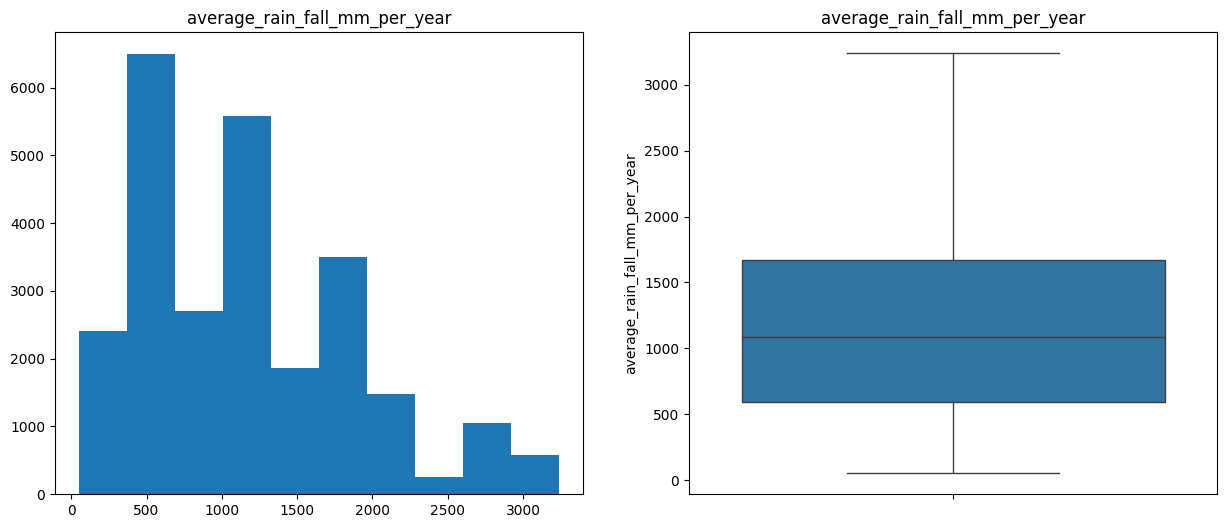

In [16]:
hibox = hist_box()
next(hibox);

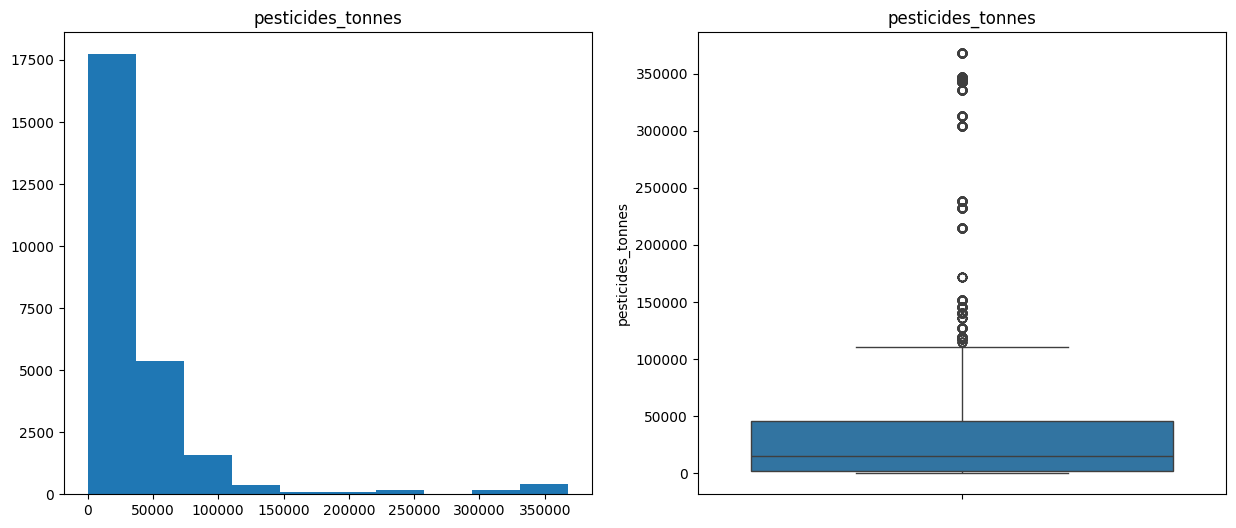

In [17]:
next(hibox);

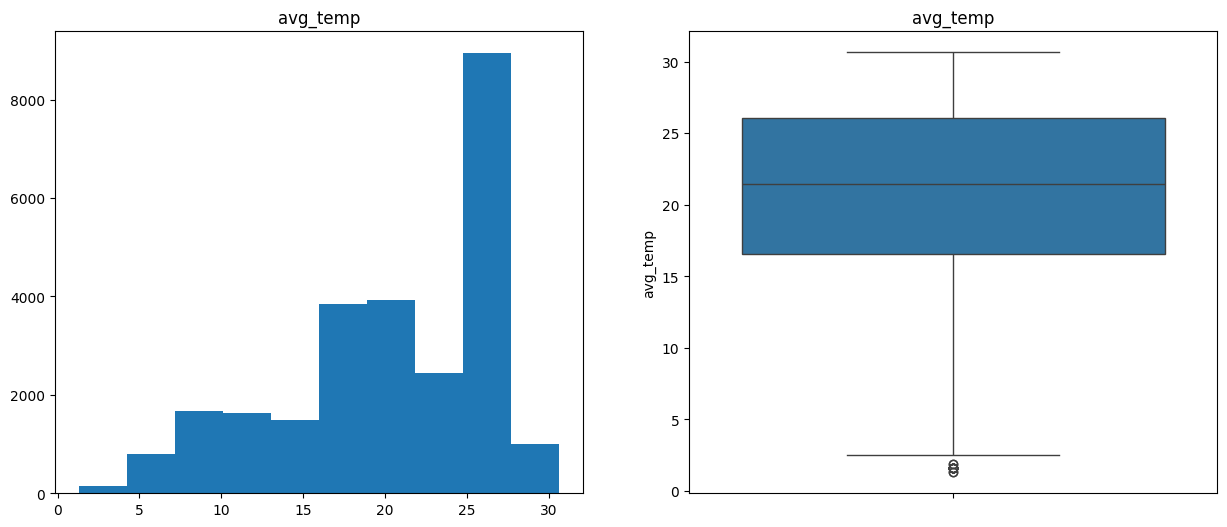

In [18]:
next(hibox);

In [19]:
q_hi  = df["hg/ha_yield"].quantile(0.90)
#clear outliers
df[(df["hg/ha_yield"] < q_hi)]

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485,121.00,16.37,36613
1,Albania,Potatoes,1990,1485,121.00,16.37,66667
2,Albania,"Rice, paddy",1990,1485,121.00,16.37,23333
3,Albania,Sorghum,1990,1485,121.00,16.37,12500
4,Albania,Soybeans,1990,1485,121.00,16.37,7000
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,657,2550.07,19.76,22581
28238,Zimbabwe,Sorghum,2013,657,2550.07,19.76,3066
28239,Zimbabwe,Soybeans,2013,657,2550.07,19.76,13142
28240,Zimbabwe,Sweet potatoes,2013,657,2550.07,19.76,22222


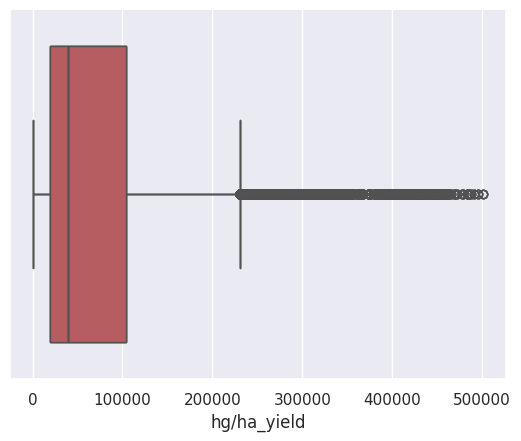

In [20]:
sns.set()
#check outliers
for i in df.columns[3:]:
    sns.boxplot(data = df , x = df["hg/ha_yield"]);

# Exploratory Data Analysis

 <a id='ho'></a>
## Histogram

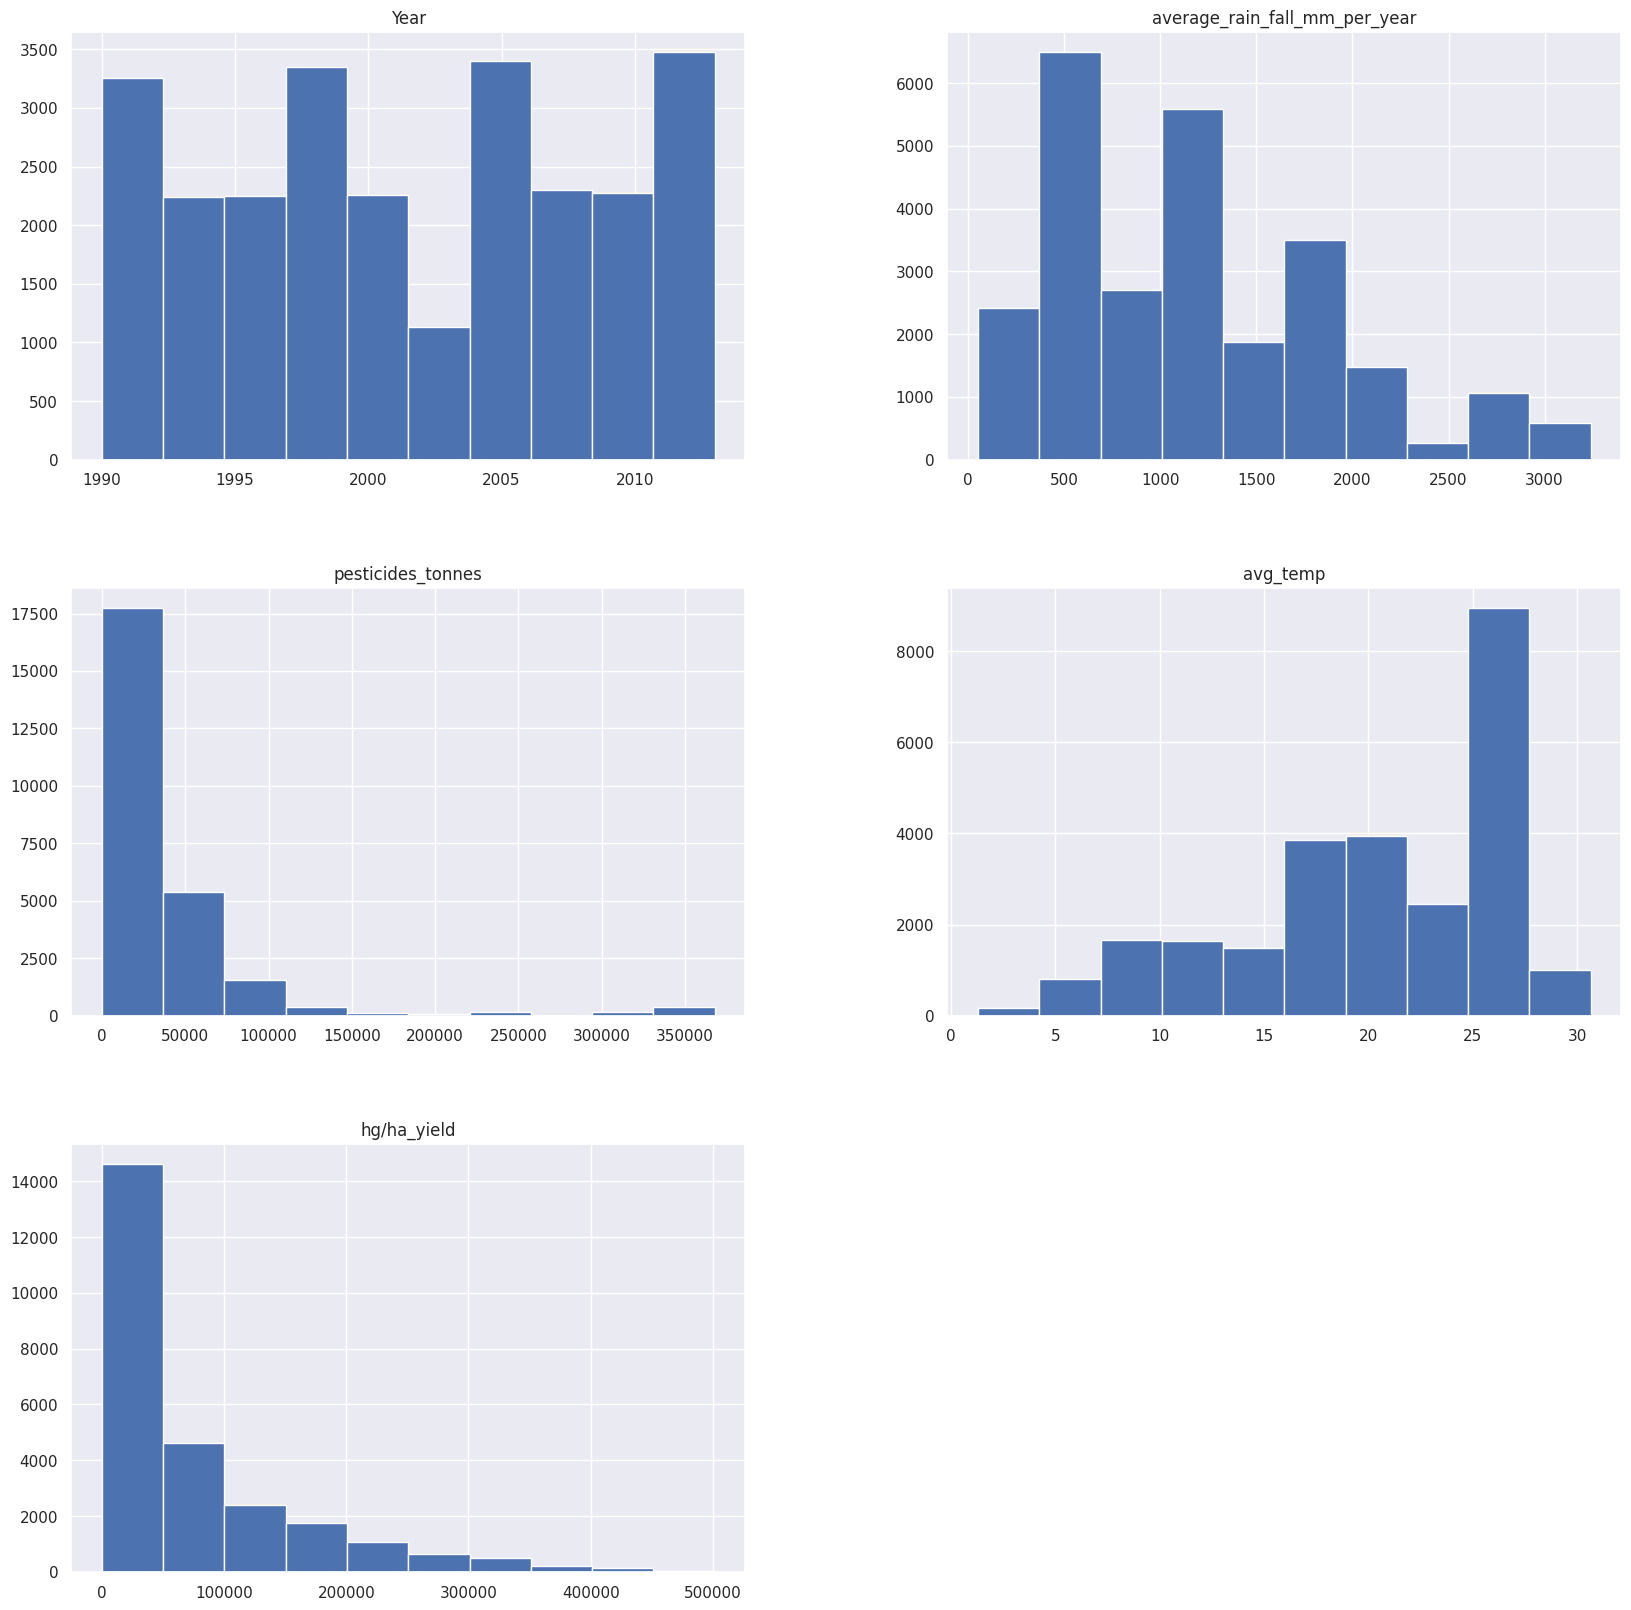

In [21]:
sns.set()
df.hist(figsize=(20,20));

## line Plot


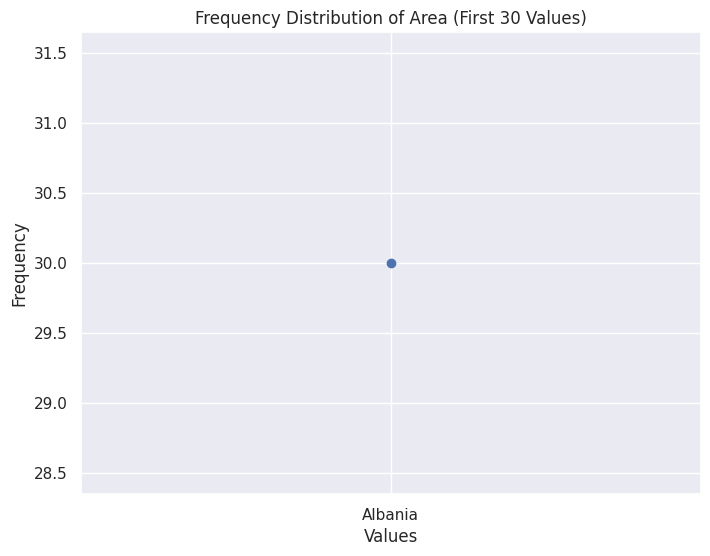

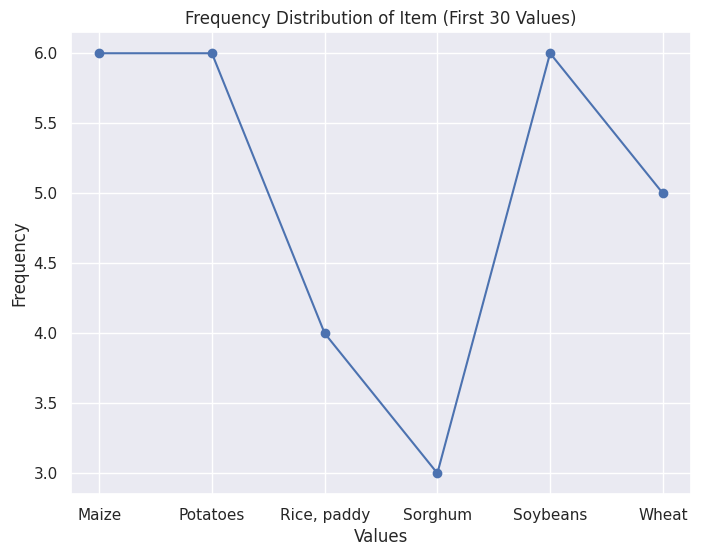

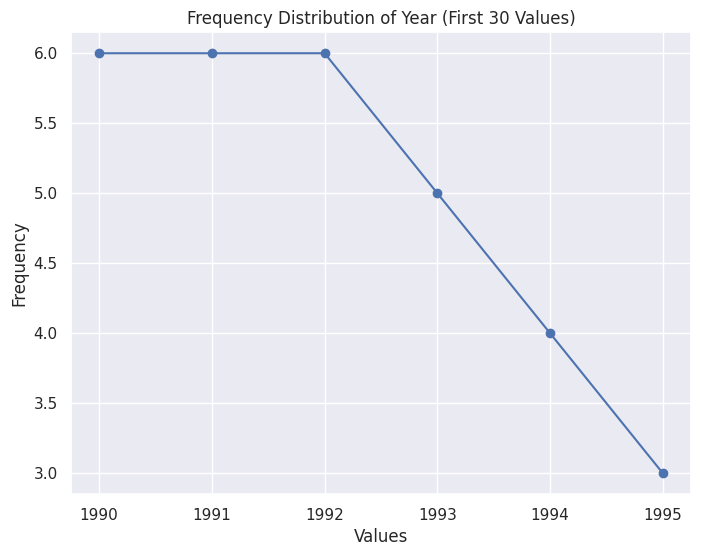

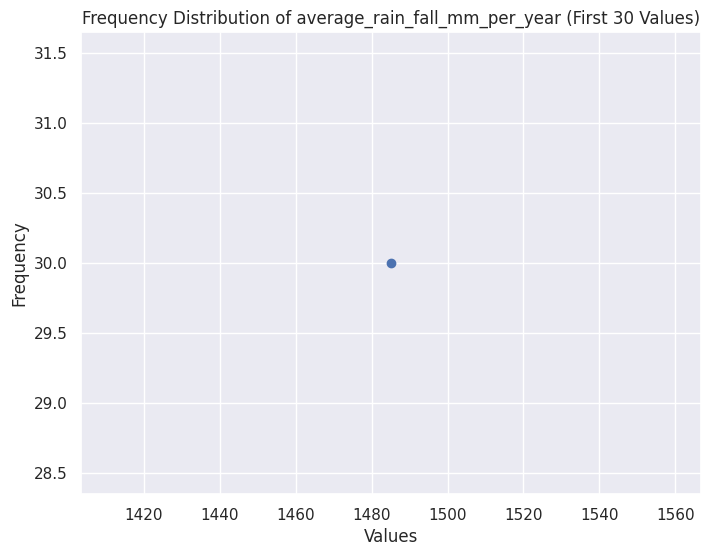

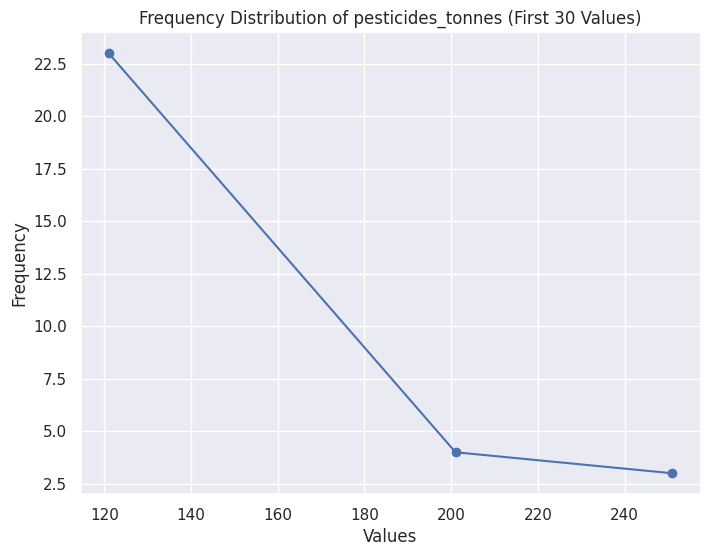

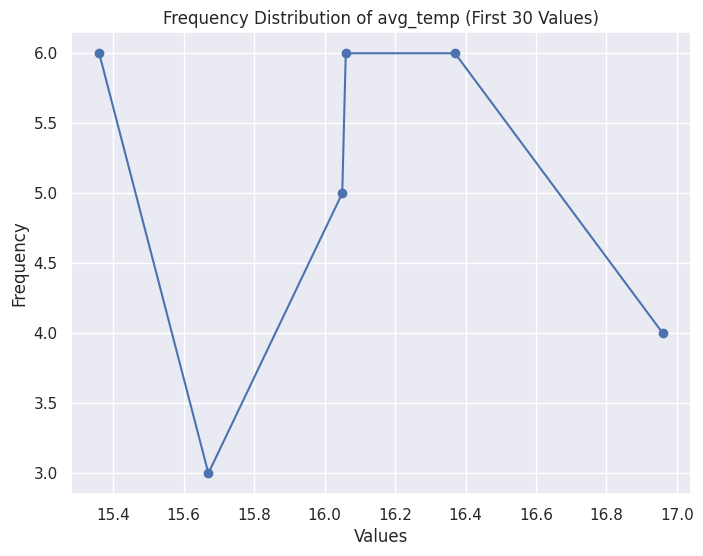

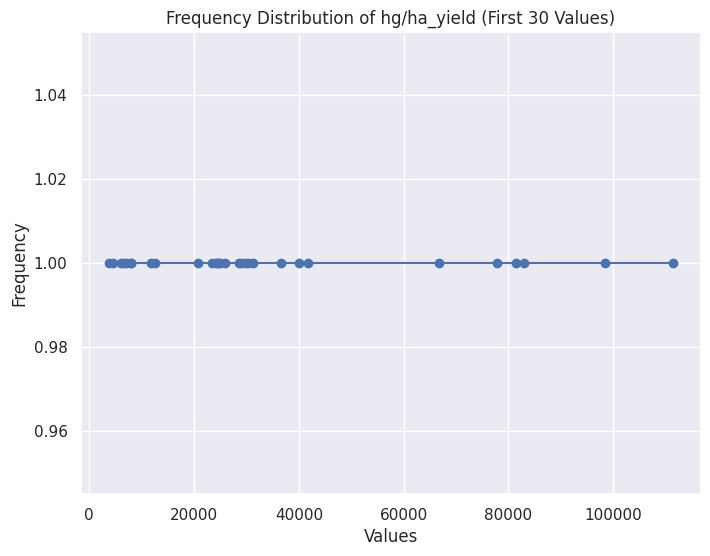

In [37]:
# Specify the range of values (first 30 values)
start_index = 0
end_index = 30

# Loop over each column in the DataFrame and plot its frequency distribution
for column in df.columns:
    # Calculate frequency counts of values in the column for the specified range
    value_counts = df[column].iloc[start_index:end_index].value_counts().sort_index()

    # Plot the frequency distribution using a line plot
    plt.figure(figsize=(8, 6))  # Set the figure size
    plt.plot(value_counts.index, value_counts.values, marker='o', linestyle='-')  # Line plot
    plt.xlabel('Values')  # Set x-axis label
    plt.ylabel('Frequency')  # Set y-axis label
    plt.title(f'Frequency Distribution of {column} (First 30 Values)')  # Set plot title
    plt.grid(True)  # Show grid
    plt.show()  # Display the plot

 <a id='bp'></a>

## Bar Plot
In this chart we will try to understand the relation between type of the crop and production

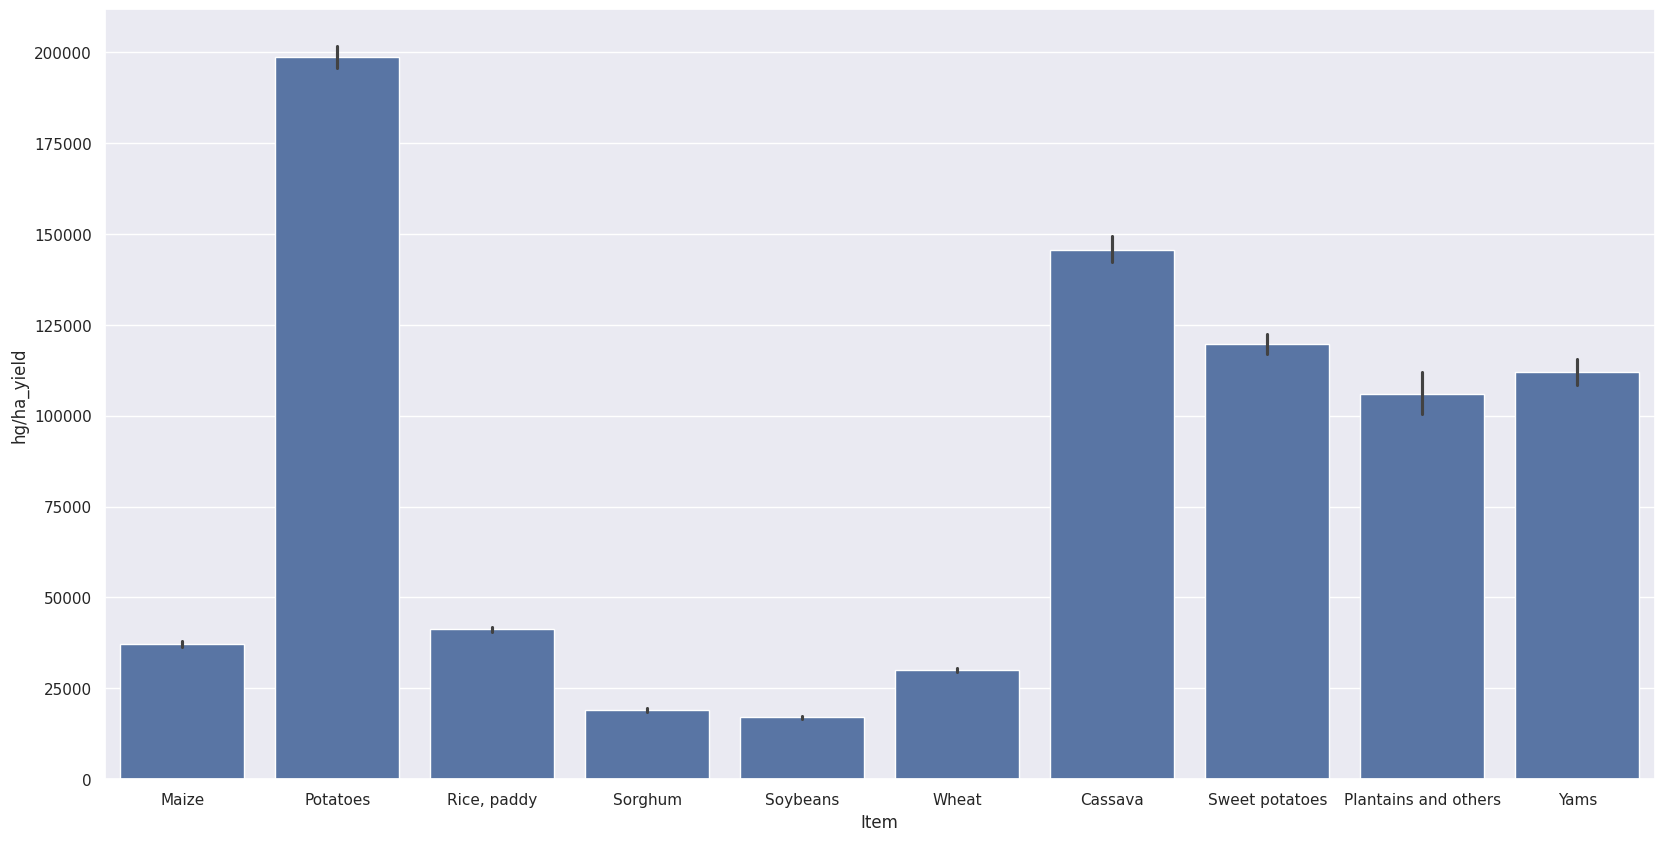

In [34]:
#visualization of Items with hg/ha_yield
sns.set()
plt.figure(figsize=(20,10))
sns.barplot(data=df, x = df.Item, y = df['hg/ha_yield'])
plt.show()

In [35]:
#group Area with Hg/Ha_Yield sum
ST_df=df.groupby(df.Area)[['hg/ha_yield']].sum()
ST_df

,hg/ha_yield
Area,
Albania,5711536
Algeria,6711464
Angola,5722563
Argentina,32864032
Armenia,4524100
...,...
Ukraine,5496901
United Kingdom,44335992
Uruguay,9539820


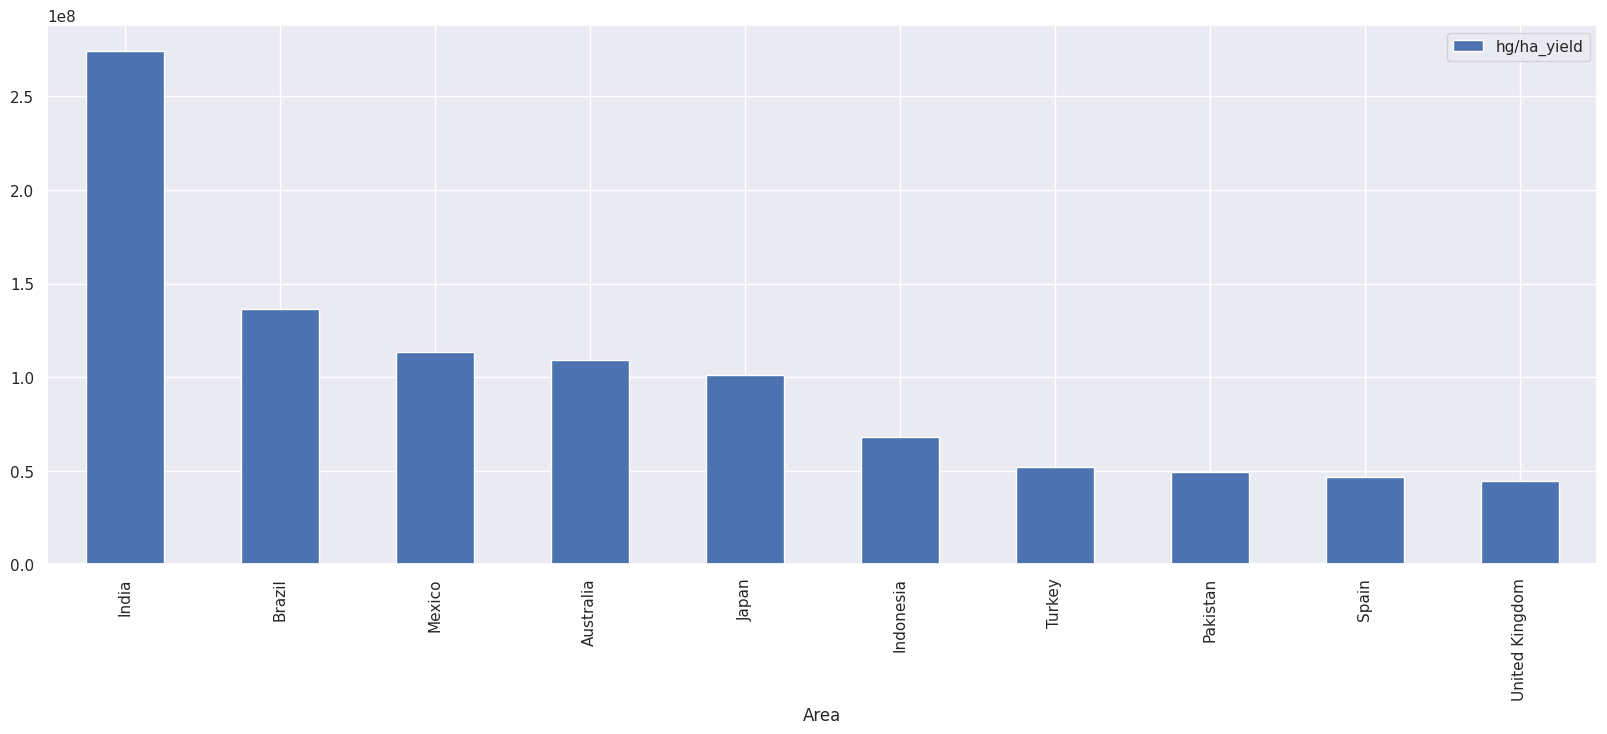

In [36]:
#Area with the sum of Hg/Ha_yield
d10 = ST_df.nlargest(10, 'hg/ha_yield')
T10 = d10.loc[:,['hg/ha_yield']].head(10)
#Visualize bar plot
sns.set()
T10.plot.bar(figsize=(20,7));

## Scatter Plot

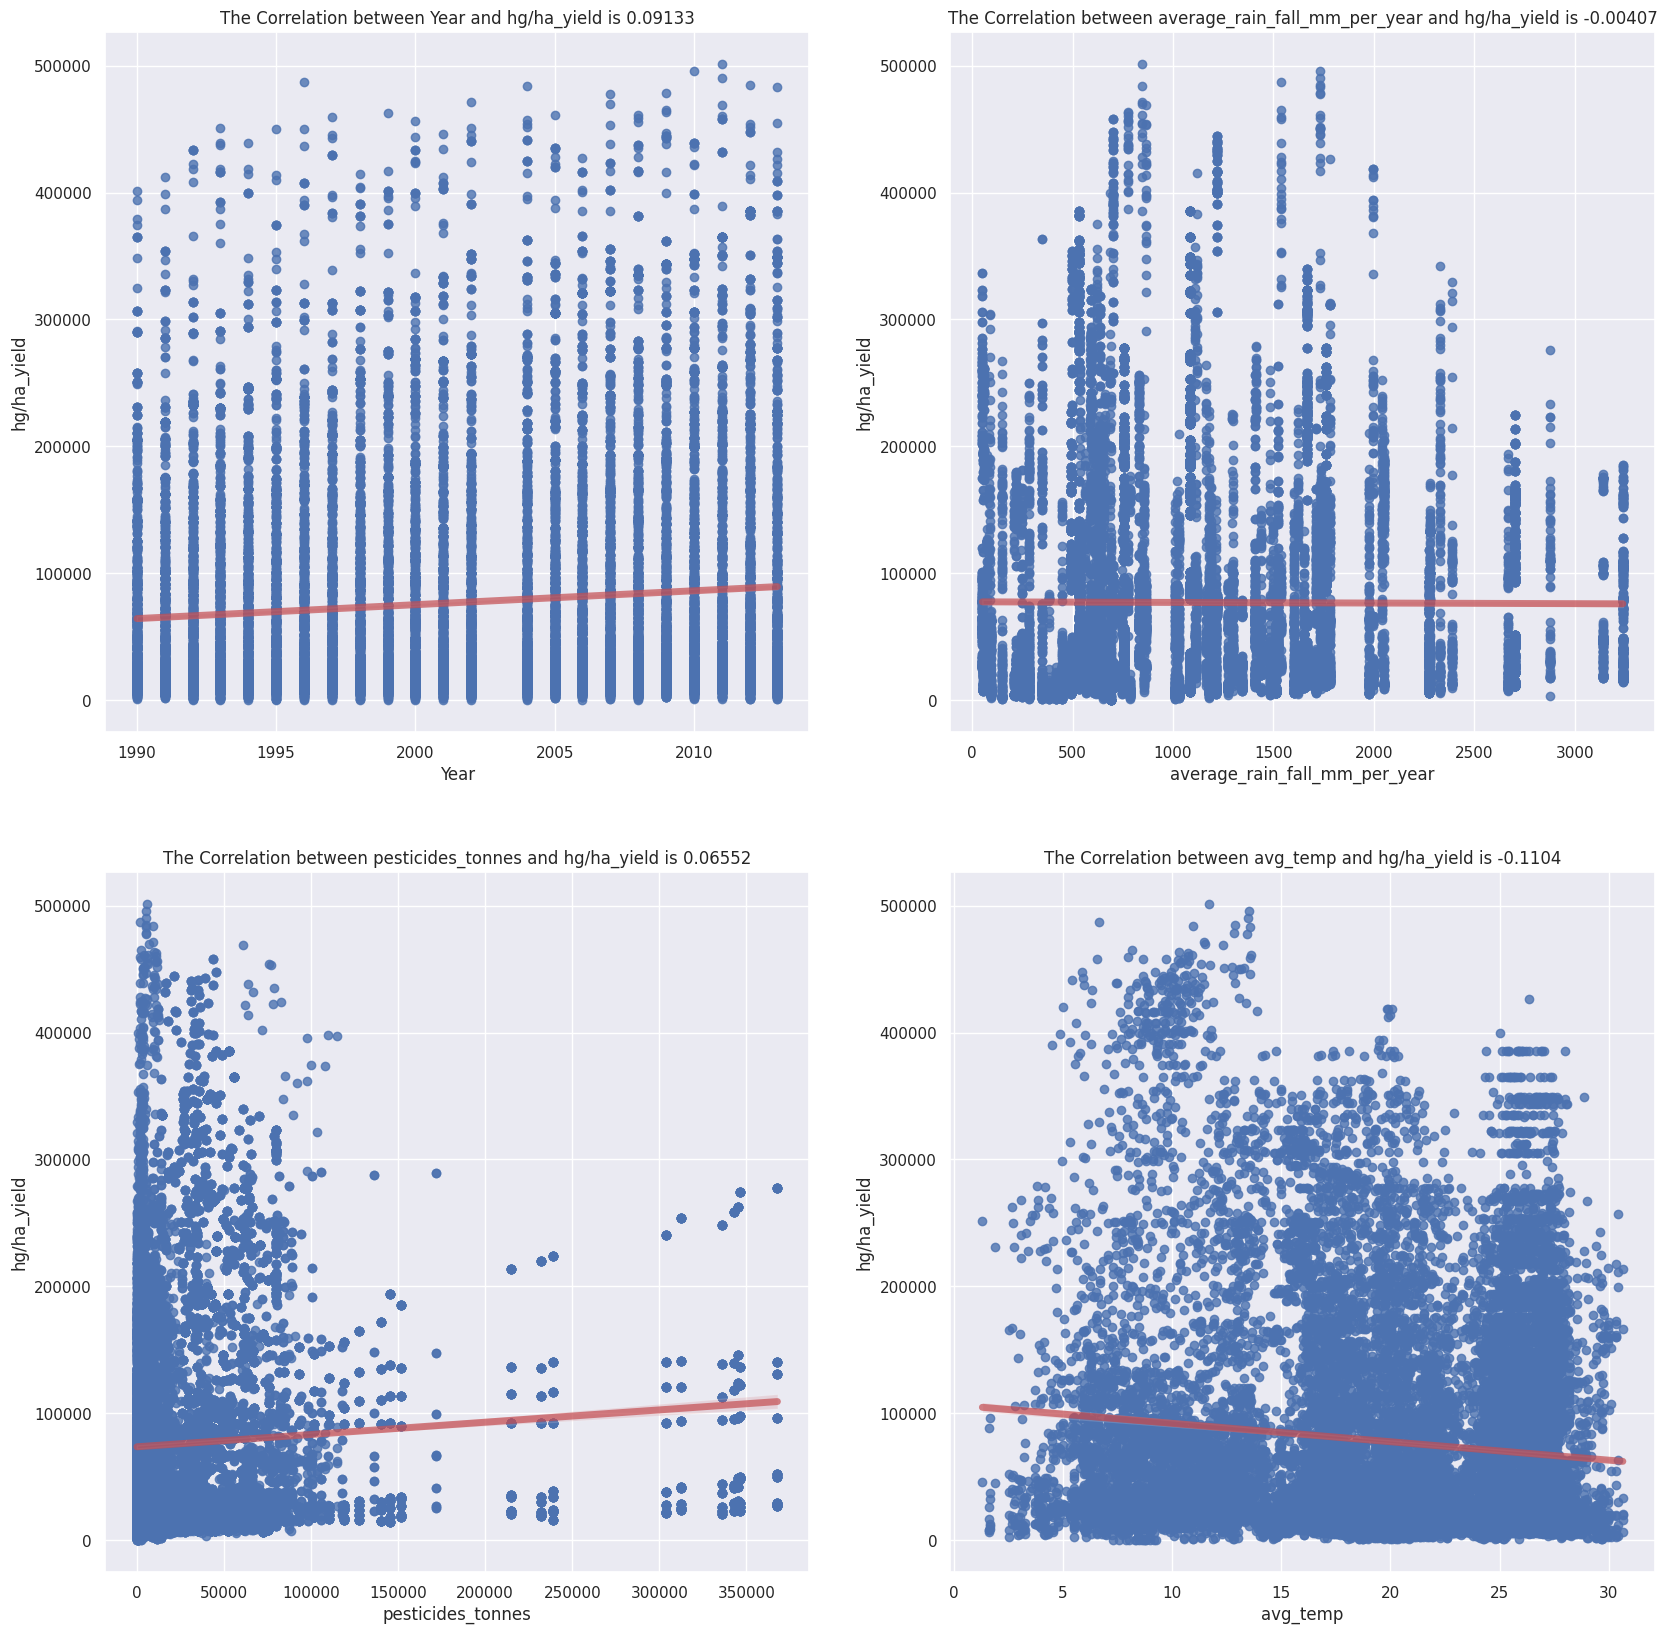

In [38]:
#make subplot for 4 plots
fig,plotcanvas=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
#Store the numerical columns name in a variable
continuouscols = df.columns[2:].tolist()
#make for loop to iterate over all columns
for i in range(0,len(continuouscols)-1):
    x = 0 if ((i == 0) or (i == 1)) else  1
    y = 0 if ((i == 0) or (i == 2)) else  1
    #make scatterplot with regression line
    sns.regplot(data = df, x = continuouscols[i], y = 'hg/ha_yield', line_kws={"color":"r","alpha":0.7,"lw":5}, ax=plotcanvas[x,y])
    #find correlation between this two columns
    cor = round(df['hg/ha_yield'].corr(df[continuouscols[i]]),5)
    #put title for this plot
    plotcanvas[x , y].set_title(f'The Correlation between {continuouscols[i]} and hg/ha_yield is {cor}')

 <a id='hm'></a>
## HeatMap

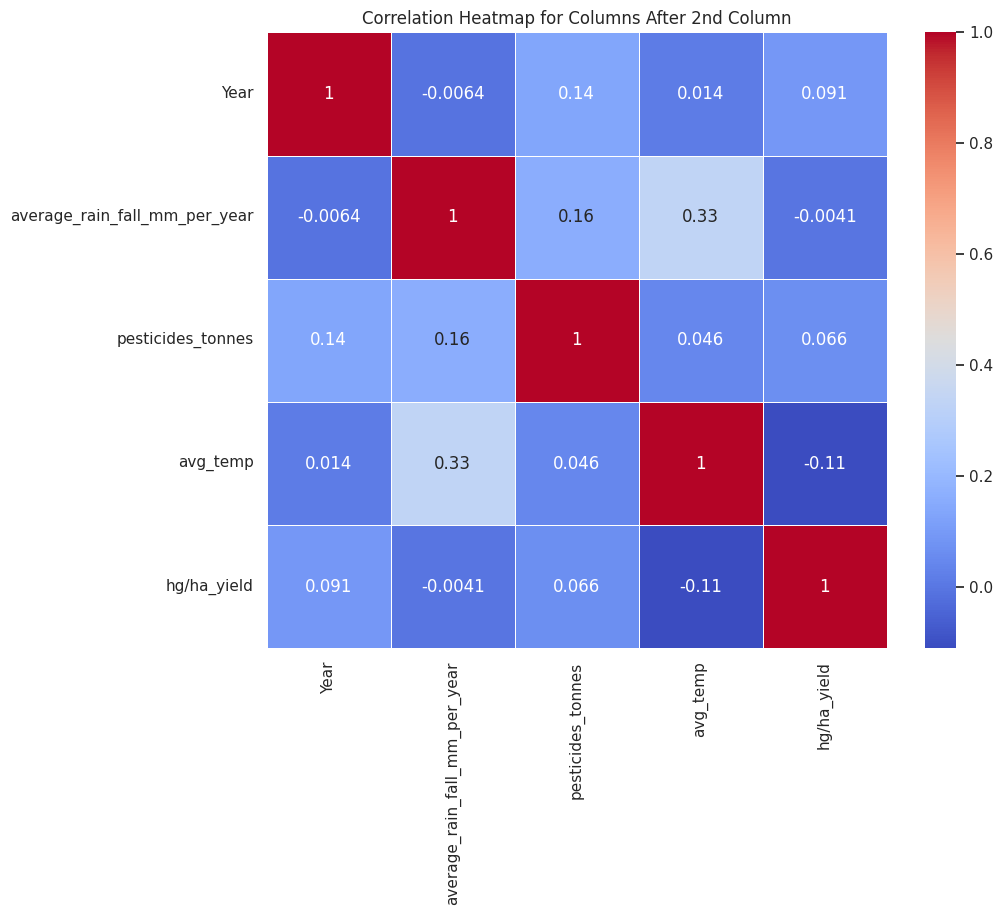

In [43]:
subset_df = df.iloc[:, 2:]

# Create the heatmap for the correlation matrix of subset columns
plt.figure(figsize=(10, 8))
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Columns After 2nd Column')
plt.show()

In [44]:
df.describe()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,1146.836688,34782.573241,20.422251,76978.132925
std,7.055924,717.391098,57228.568244,6.439402,84647.605552
min,1990.000000,51.000000,0.040000,1.300000,50.000000
25%,1995.000000,593.000000,1597.000000,16.580000,19996.000000
50%,2001.000000,1083.000000,15373.000000,21.420000,39530.000000
75%,2008.000000,1668.000000,45620.000000,26.060000,104168.000000
max,2013.000000,3240.000000,367778.000000,30.650000,501412.000000


## One Hot Encoding

In [45]:
#one hot encoding for the categorical columns to can be trained in the model
df = pd.get_dummies(df,columns=['Area','Item'])
df.rename(columns={x:x[5:] for x in df.columns[6:]}, inplace = True)
df.head(10)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield,Area_Albania,Algeria,Angola,Argentina,Armenia,...,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams
0,1990,1485,121.0,16.37,36613,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1990,1485,121.0,16.37,66667,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1990,1485,121.0,16.37,23333,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1990,1485,121.0,16.37,12500,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1990,1485,121.0,16.37,7000,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,1990,1485,121.0,16.37,30197,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,1991,1485,121.0,15.36,29068,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,1991,1485,121.0,15.36,77818,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8,1991,1485,121.0,15.36,28538,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9,1991,1485,121.0,15.36,6667,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [46]:
#split the data from the target data
x = df.drop(labels=['hg/ha_yield'], axis=1)
y = df['hg/ha_yield']

In [47]:
y.describe()

count     25932.000000
mean      76978.132925
std       84647.605552
min          50.000000
25%       19996.000000
50%       39530.000000
75%      104168.000000
max      501412.000000
Name: hg/ha_yield, dtype: float64

<a id='dr'></a>
## Dimension Reduction

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(x)

<a id='sd'></a>

## Spliting Data

In [49]:
#split data to x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40,shuffle=True)

In [50]:
#clear memory
del df
del x
del y

In [51]:
#Shape of the data
print('Shape of the x_train data : ', x_train.shape)
print('Shape of the y_train data : ', y_train.shape)
print('Shape of the x_test data : ', x_test.shape)
print('Shape of the y_test data : ', y_test.shape)

Shape of the x_train data :  (18152, 115)
Shape of the y_train data :  (18152,)
Shape of the x_test data :  (7780, 115)
Shape of the y_test data :  (7780,)


### Evaluation Function

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#Evaluation function for regression models
def regression_report(y_true, y_pred):

    error = y_true - y_pred

    #Evaluation matrics
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    maxerr = max_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    metrics = [
        ('Mean Absolute Error', mae),
        ('Median Absolute Error', medae),
        ('Mean Squared Error', mse),
        ('Root Mean Squared Error', rmse),
        ('Max error', maxerr) ,
        ('R2 score', r_squared),
        ('Explained variance score', evs),
        ('Mean Absolute Percentage Error', mape)
    ]

    print('Regression Report:')
    for metric_name, metric_value in metrics:
        print(f'\t\t\t{metric_name:30s}: {metric_value: >20.3f}')

    return mae, medae, mse, rmse, maxerr, r_squared, evs, mape

#  Regression Models

<a id='sgd'></a>

# Linear Regression

In [57]:
from sklearn.linear_model import SGDRegressor
param_grid = {
    'learning_rate': ['constant', "optimal", "invscaling", "adaptive" ]
}
sgd = SGDRegressor()
model = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5,verbose=0)
model.fit(x_train, y_train)
sgd_pred = model.predict(x_test)
mae, medae, mse, rmse, maxerr, r_squared, evs, mape = regression_report(y_test, sgd_pred)
row = {"Model": "SGDRegressor", "MAE": mae,"MEDAE": medae, "MSE": mse, "RMSE": rmse,
           "Max Error": maxerr, "R2 Score": r_squared, "EVS": evs, "MAPE": mape}

Regression Report:
			Mean Absolute Error           :            30143.608
			Median Absolute Error         :            21125.022
			Mean Squared Error            :       1868566366.213
			Root Mean Squared Error       :            43226.917
			Max error                     :           294087.404
			R2 score                      :                0.745
			Explained variance score      :                0.745
			Mean Absolute Percentage Error:                0.923


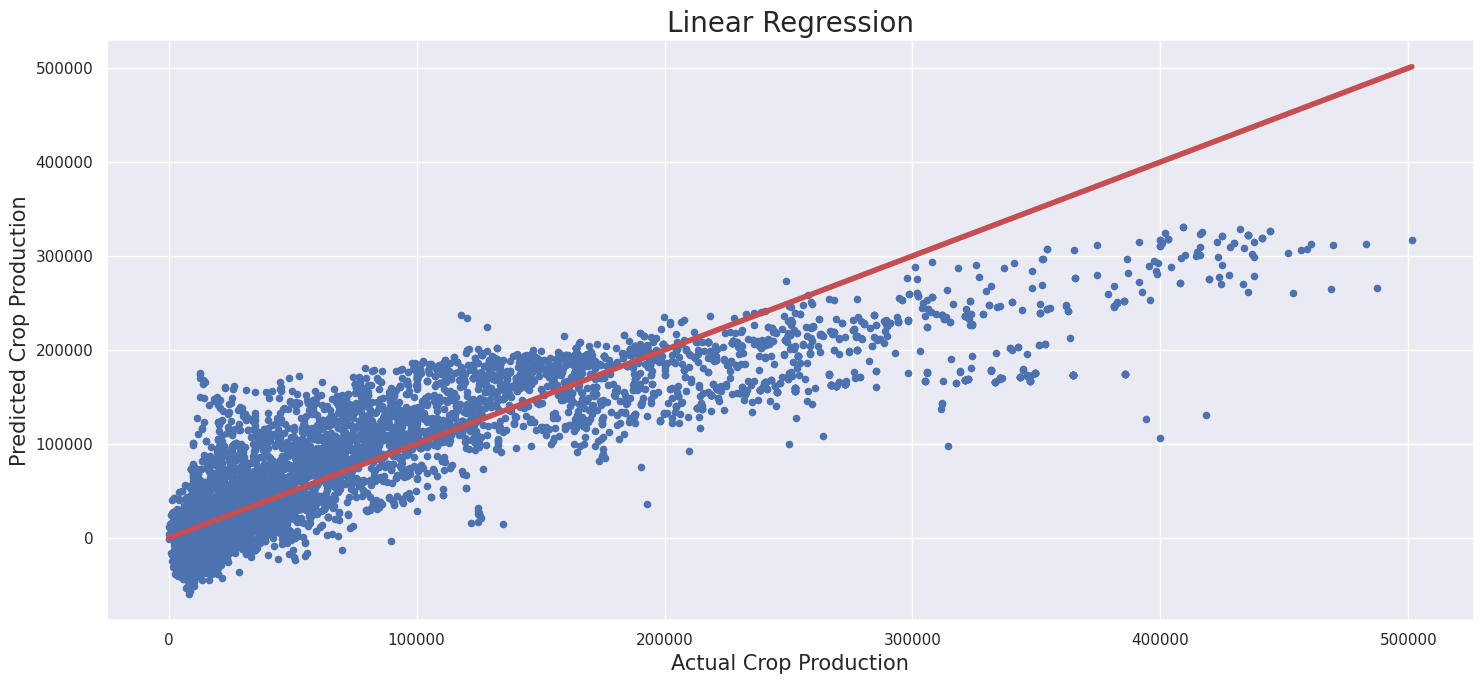

In [79]:
plt.figure(figsize=(15,7))
plt.scatter(y_test, sgd_pred, s=20)
plt.title('Linear Regression',fontsize=20)
plt.xlabel('Actual Crop Production',fontsize=15)
plt.ylabel('Predicted Crop Production',fontsize=15)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linewidth = 4)
plt.tight_layout()

<a id='rfr'></a>

# Random Forest Regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

rfr.fit(x_train, y_train)

RandomForestRegressor()

In [77]:
# print("The best parameters are %s with a score of %0.2f"
#       % (rfr.best_params_, rfr.best_score_))
rfr_pred = rfr.predict(x_test)
mae, medae, mse, rmse, maxerr, r_squared, evs, mape = regression_report(y_test, rfr_pred)
row = {"Model": "RandomForestRegressor", "MAE": mae,"MEDAE": medae, "MSE": mse, "RMSE": rmse,
           "Max Error": maxerr, "R2 Score": r_squared, "EVS": evs, "MAPE": mape}

Regression Report:
			Mean Absolute Error           :             4027.042
			Median Absolute Error         :             1072.290
			Mean Squared Error            :         92026686.190
			Root Mean Squared Error       :             9593.054
			Max error                     :           126904.570
			R2 score                      :                0.987
			Explained variance score      :                0.987
			Mean Absolute Percentage Error:                0.104


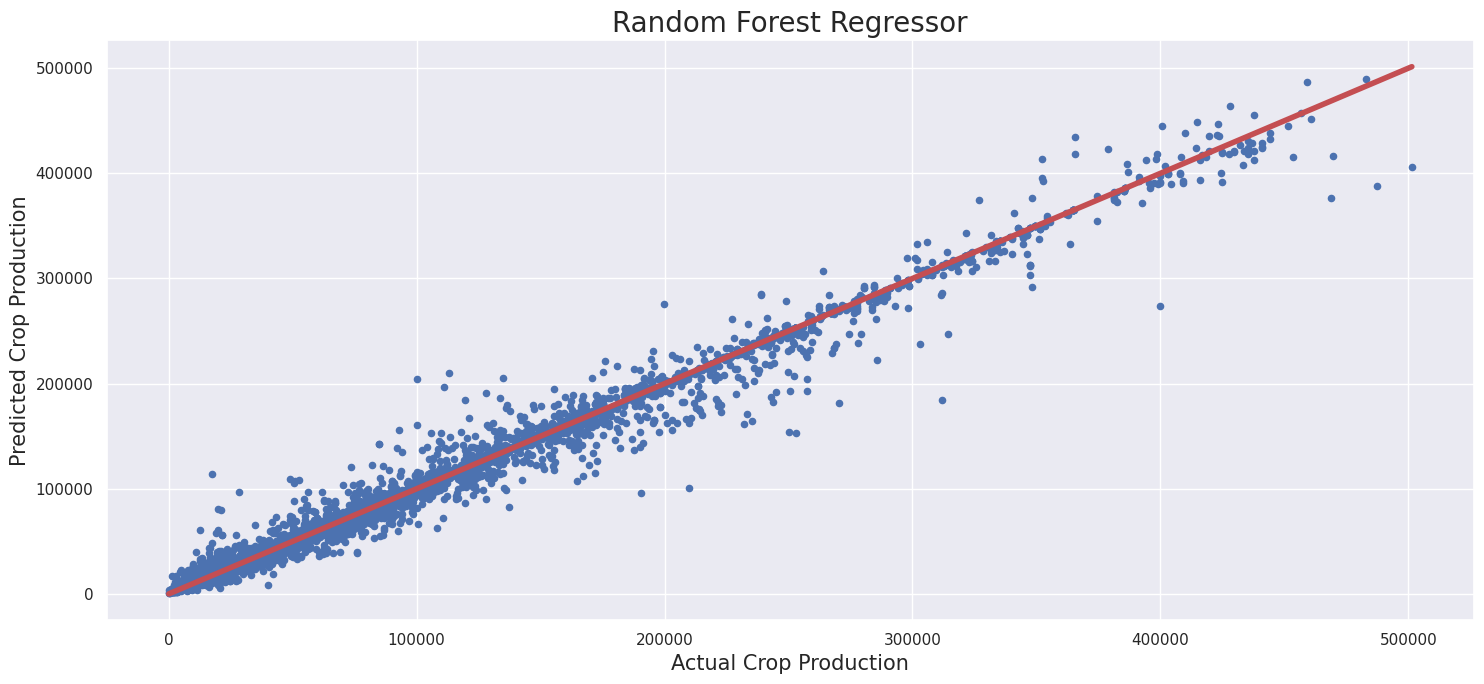

In [78]:
plt.figure(figsize=(15,7))
plt.scatter(y_test, rfr_pred, s=20)
plt.title('Random Forest Regressor',fontsize=20)
plt.xlabel('Actual Crop Production',fontsize=15)
plt.ylabel('Predicted Crop Production',fontsize=15)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linewidth = 4)
plt.tight_layout()